# Take a look at the data set

In [31]:
%env PYTHONHASHSEED=0
%load_ext autoreload
%autoreload 2

env: PYTHONHASHSEED=0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import numpy as np
import pandas as pd
np.random.seed(42)

from tv_show_recommender.data.functions import get_split_data, get_all_data, stratified_shuffle


In [33]:
data = get_all_data()

In [34]:
data.head()

,show_id,user_id,rating,primary_title,start_year,end_year,genres,average_rating,num_votes
0,2402207,2860723,7,The Last Ship,2014,2018,"Action,Drama,Sci-Fi",7.4,62634
1,2402207,22484170,8,The Last Ship,2014,2018,"Action,Drama,Sci-Fi",7.4,62634
2,2402207,11762,7,The Last Ship,2014,2018,"Action,Drama,Sci-Fi",7.4,62634
3,2402207,44112735,5,The Last Ship,2014,2018,"Action,Drama,Sci-Fi",7.4,62634
4,2402207,18044142,2,The Last Ship,2014,2018,"Action,Drama,Sci-Fi",7.4,62634


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517309 entries, 0 to 517308
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   show_id         517309 non-null  int64  
 1   user_id         517309 non-null  int64  
 2   rating          517309 non-null  int64  
 3   primary_title   517309 non-null  object 
 4   start_year      517309 non-null  int64  
 5   end_year        517309 non-null  object 
 6   genres          517309 non-null  object 
 7   average_rating  517309 non-null  float64
 8   num_votes       517309 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 35.5+ MB


In [36]:
# Number of ratings per show
data['show_id'].value_counts()

show_id
11912196    1271
14392248    1271
12004706    1270
9778022     1268
9680440     1268
            ... 
112064         7
3671754        6
88491          4
60019          4
421291         3
Name: count, Length: 1722, dtype: int64

In [37]:
data['genres'].value_counts()

genres
Crime,Drama,Mystery           35428
Action,Adventure,Drama        34027
Action,Crime,Drama            26048
Action,Adventure,Animation    25997
Comedy,Drama                  25023
                              ...  
Adventure,Reality-TV             34
Animation,Sport,Thriller         26
Adventure,Animation,Family       19
Animation,Comedy,Sci-Fi          17
Action,Comedy,Reality-TV         15
Name: count, Length: 219, dtype: int64

In [38]:
data['rating'].value_counts()

rating
10    185257
9      70286
8      55334
1      51401
7      35691
5      26942
6      26760
3      22949
2      22296
4      20393
Name: count, dtype: int64

In [39]:
len(data['user_id'].unique().tolist())

304536

In [40]:
data.describe()

,show_id,user_id,rating,start_year,average_rating,num_votes
count,5.173090e+05,5.173090e+05,517309.000000,517309.000000,517309.000000,5.173090e+05
mean,6.324048e+06,7.289851e+07,7.189774,2015.471981,7.690546,1.327031e+05
std,4.615394e+06,4.612158e+07,3.133158,7.486563,1.030931,2.208649e+05
min,4.320800e+04,1.100000e+01,1.000000,1951.000000,1.100000,7.010000e+02
25%,2.249007e+06,3.208508e+07,5.000000,2014.000000,7.300000,2.360700e+04
50%,5.834204e+06,6.851950e+07,8.000000,2018.000000,7.900000,5.534500e+04
75%,9.288030e+06,1.118937e+08,10.000000,2020.000000,8.400000,1.408200e+05
max,2.885718e+07,1.732340e+08,10.000000,2023.000000,9.500000,2.224679e+06


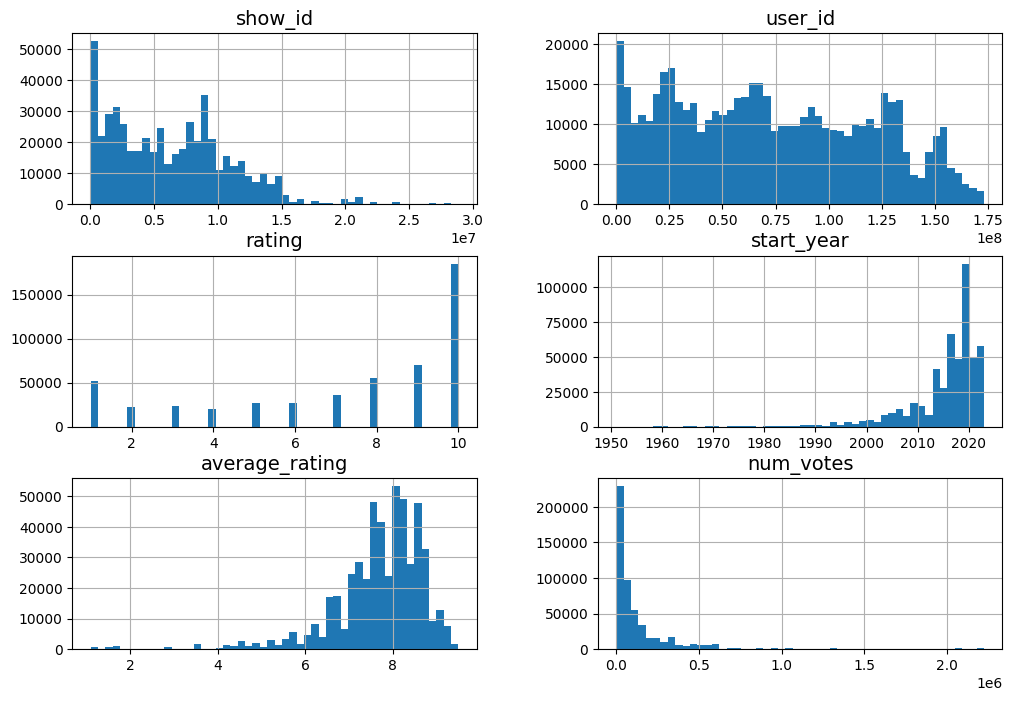

In [41]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.show()

In [42]:
train_set, test_set = get_split_data(0.2)

In [43]:
len(train_set)

413848

In [44]:
len(test_set)

103461

In [45]:
print(f"{train_set.iloc[0].show_id} {train_set.iloc[1].show_id}")

4354880 4955642


<Axes: >

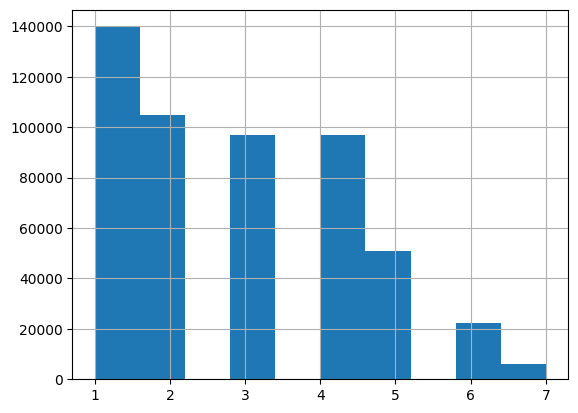

In [46]:
data['popularity'] = pd.cut(data['num_votes'], bins=[0, 25000, 50000, 100000, 250000, 500000, 1000000, np.inf], labels=[1, 2, 3, 4, 5, 6, 7])
data['popularity'].hist()

In [47]:
# Uniformly shuffle our data so that the sets have an equal distribution of popular and unpopular shows
# If we had one with all the popular shows and the other without, that would skew our model or our validation

whole_data_set = data.copy()
strat_train_set, strat_test_set = stratified_shuffle(data, "popularity")

strat_test_set["popularity"].value_counts() / len(strat_test_set)

popularity
1    0.269896
2    0.202267
3    0.187663
4    0.187093
5    0.098239
6    0.043456
7    0.011386
Name: count, dtype: float64

In [48]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("popularity", axis=1, inplace=True)

# Visualize the data

In [49]:
data = strat_train_set.copy()

<Axes: xlabel='average_rating', ylabel='num_votes'>

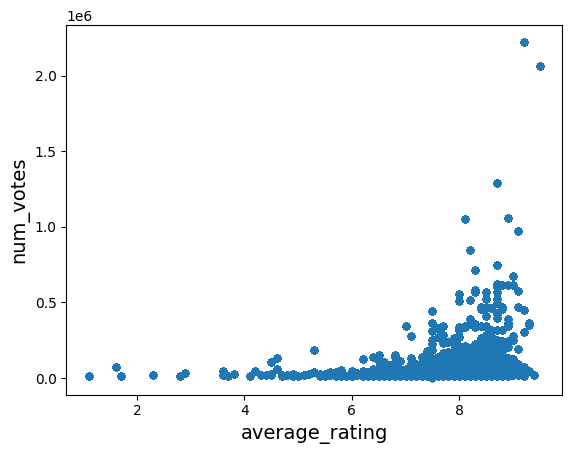

In [50]:
data.plot(kind="scatter", x="average_rating", y="num_votes")

In [51]:
corr_matrix = data.drop(["genres", "primary_title", "end_year"], axis=1).corr()

corr_matrix["rating"].sort_values(ascending=False)

rating            1.000000
average_rating    0.314931
user_id           0.107438
num_votes         0.056437
show_id          -0.029434
start_year       -0.106700
Name: rating, dtype: float64

array([[<Axes: xlabel='average_rating', ylabel='average_rating'>,
        <Axes: xlabel='start_year', ylabel='average_rating'>,
        <Axes: xlabel='num_votes', ylabel='average_rating'>],
       [<Axes: xlabel='average_rating', ylabel='start_year'>,
        <Axes: xlabel='start_year', ylabel='start_year'>,
        <Axes: xlabel='num_votes', ylabel='start_year'>],
       [<Axes: xlabel='average_rating', ylabel='num_votes'>,
        <Axes: xlabel='start_year', ylabel='num_votes'>,
        <Axes: xlabel='num_votes', ylabel='num_votes'>]], dtype=object)

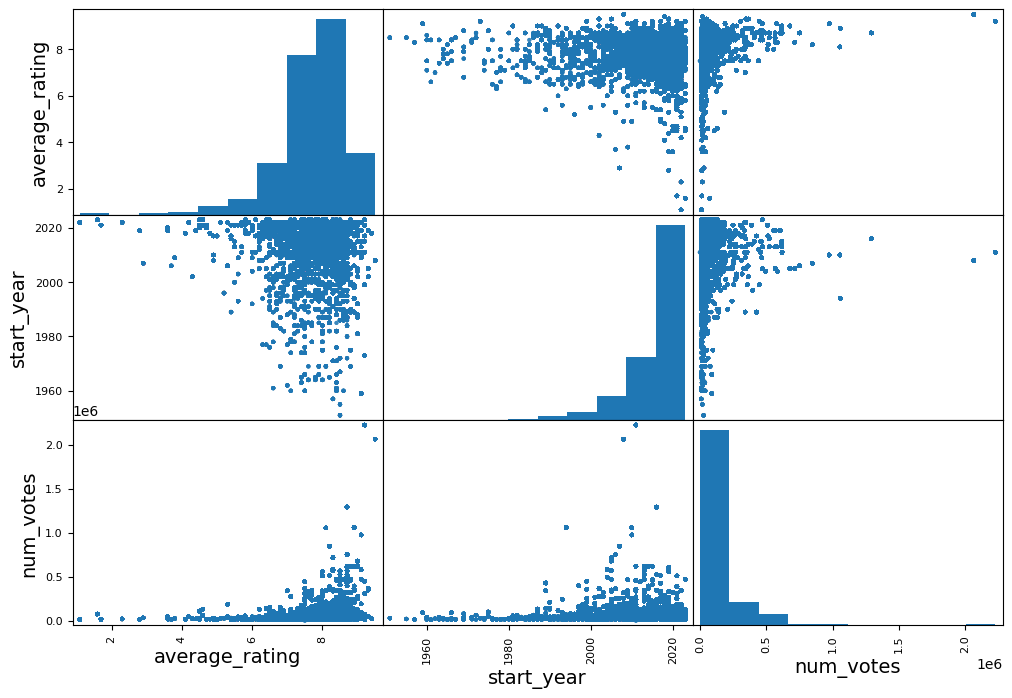

In [52]:
from pandas.plotting import scatter_matrix

attributes = ["average_rating", "start_year", "genres", "num_votes"]

scatter_matrix(data[attributes], figsize=(12, 8))

# Preparing data for our algorithms

In [53]:
# Let's generate (to start): { user_id, show_id, is_liked }
# If that doesn't work, consider adding other features: is_$GENRE, is_popular

data = strat_train_set.copy()

data_ratings = data[["rating"]]
data_ratings.value_counts()

rating
10        148115
9          56305
8          44108
1          41183
7          28644
5          21577
6          21513
3          18294
2          17859
4          16249
Name: count, dtype: int64

In [54]:
from tv_show_recommender.pipelines import get_basic_nn_pipeline

pipeline = get_basic_nn_pipeline()
data_prepared = pipeline.fit_transform(data)

data_prepared.head()


,show_id,user_id,is_liked
160700,19854762,48134010,0
8280,1236246,33704671,1
135037,9077540,3589319,0
76913,5555260,163393781,1
380662,5164196,94117410,1


# Select and train a model

In [55]:
from sklearn.neighbors import NearestNeighbors

data_processed = data_prepared.drop_duplicates(subset=['user_id', 'show_id'])
# We want each row to be the user's ratings for a particular show such that we can feed a new "user_row"
# with their preferences into the prediction algorithm
show_user_df = data_processed.pivot(index='user_id', columns='show_id', values='is_liked').fillna(0)

show_user_df.head()


show_id,43208,47708,50051,52520,53479,53488,53502,54533,55683,56751,...,22014226,22074164,22185582,22297578,22373148,23037654,23900194,26693803,28227737,28857177
user_id,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(show_user_df.T)


NearestNeighbors(algorithm='brute', metric='cosine')

In [57]:
# The Wire
show_id = 306414
liked_shows = [show_id]
similar_shows_indices = []

show_index = show_user_df.columns.get_loc(show_id)
show_is_liked_series = show_user_df.iloc[:, show_index]

show_is_liked_values = show_is_liked_series.values.reshape(1, -1)

distances, indices = knn.kneighbors(show_is_liked_values, n_neighbors=3)
similar_shows_indices = indices.flatten().tolist()
similar_show_ids = show_user_df.columns[similar_shows_indices]

print(similar_show_ids)
# => The Sopranos, Breaking Bad


Index([306414, 141842, 903747], dtype='int64', name='show_id')


In [58]:
# How about multiple shows?

from tv_show_recommender.predictors import predict_nearest_neighbor

# The Wire, DS9, The Sopranos
liked_shows = [306414, 106145, 141842]

similar_show_ids = predict_nearest_neighbor(liked_shows, model=knn, df=show_user_df)

print(similar_show_ids)


[92455, 112178, 979432, 903747]


In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# So...how can we evaluate our algorithms?
# Evaluate user liked shows from test data against prediction algorithm
# E.g., given liked shows from test, see if algorithm generates shows the user likes in our training data

# Get our test data
test_data_prepared = pipeline.fit_transform(strat_test_set)
test_data_processed = test_data_prepared.drop_duplicates(subset=['user_id', 'show_id'])
test_show_user_df = test_data_processed.pivot(index='user_id', columns='show_id', values='is_liked').fillna(0)

# Pad the test data to have an equal # of users and shows
difference = len(show_user_df) - len(test_show_user_df)
missing_user_ids = [0] * difference
padded_rows = pd.DataFrame(0, columns=test_show_user_df.columns, index=missing_user_ids)
padded_rows['user_id'] = missing_user_ids
test_show_user_df = pd.concat([test_show_user_df, padded_rows.set_index('user_id')])

missing_columns = show_user_df.columns.difference(test_show_user_df.columns)

for column in missing_columns:
    test_show_user_df[column] = 0

test_show_user_df = test_show_user_df.copy()


def is_user_in_both_sets(user_id):
    if user_id in show_user_df.index and user_id in test_show_user_df.index:
        return True

    return False

def get_user_liked_shows_from_test(user_id):
     return test_show_user_df.columns[test_show_user_df.loc[user_id] == 1].tolist()

def get_user_liked_shows_from_train(user_id):
    return show_user_df.columns[show_user_df.loc[user_id] == 1].tolist()

def precision_at_k(actual_liked_items, recommended_items, k):
    recommended_items_cross_section = []

    for actual_liked_item in actual_liked_items:
        if actual_liked_item in recommended_items:
            recommended_items_cross_section.append(actual_liked_item)
        else:
            recommended_items_cross_section.append(0)

    num_relevant_recommendations = len(set(actual_liked_items) & set(recommended_items_cross_section))

    precision = num_relevant_recommendations / k if k > 0 else 0
    return precision


precision_scores = []

at_least_3_liked_shows = test_show_user_df[test_show_user_df.eq(1.0).sum(axis=1) >= 3]

for user_id, df in at_least_3_liked_shows.head(100).groupby("user_id"):
    if not is_user_in_both_sets(user_id):
        continue

    test_user_liked_shows = get_user_liked_shows_from_test(user_id)

    if len(test_user_liked_shows) == 0:
        continue

    actual_user_liked_shows = get_user_liked_shows_from_train(user_id)
    recommended_shows = predict_nearest_neighbor(test_user_liked_shows, model=knn, df=test_show_user_df)

    precision_score = precision_at_k(actual_user_liked_shows, recommended_shows, 1)
    precision_scores.append(precision_score)

mean_precision = np.mean(precision_scores)

print("Mean Precision:", mean_precision)
# Is
# Was 0.1427 when run on all, but this takes forever

/var/folders/0p/jtbnm2_n28v73m_gyzk0grxw0000gn/T/ipykernel_44182/235421581.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_show_user_df[column] = 0


Mean Precision: 0.3711340206185567


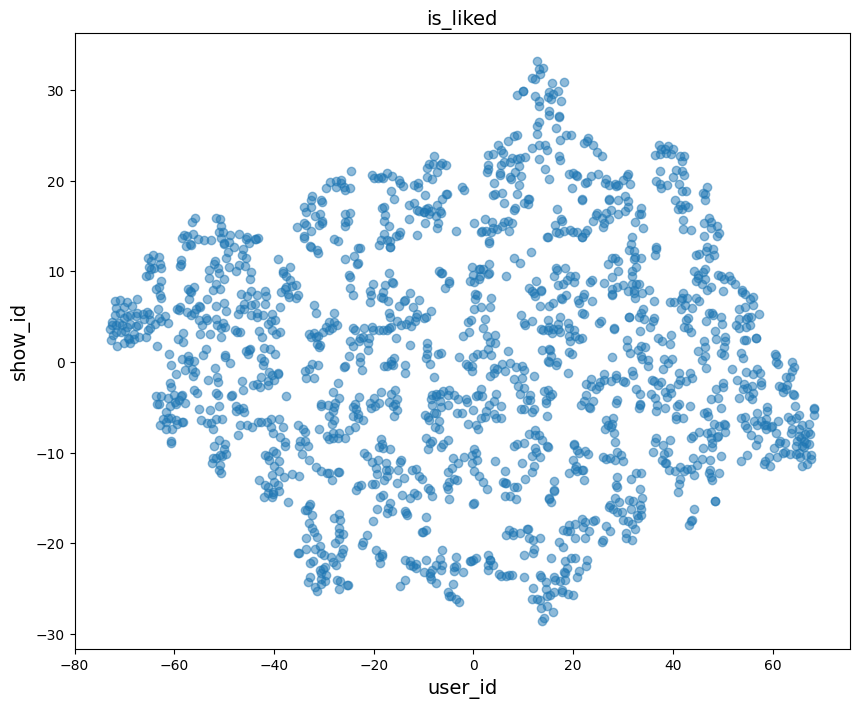

In [60]:
# Can we visualize our collaborative filtering model?

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

similarities = knn.kneighbors(show_user_df.T, return_distance=False)

tsne = TSNE(n_components=2, random_state=42)
embedded_similarities = tsne.fit_transform(similarities)

# Plot the visualization
plt.figure(figsize=(10, 8))
plt.scatter(embedded_similarities[:, 0], embedded_similarities[:, 1], alpha=0.5)
plt.title('is_liked')
plt.xlabel('user_id')
plt.ylabel('show_id')
plt.show()